In [1]:
#importing libraries
import time
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [2]:
df=pd.read_csv('../data/cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            960 non-null    object 
 1   Processor_Brand  960 non-null    object 
 2   Processor_Type   960 non-null    object 
 3   Storage_SSD      915 non-null    float64
 4   Storage_HDD      71 non-null     float64
 5   RAM_GB           960 non-null    int64  
 6   RAM_Type         960 non-null    object 
 7   OS               960 non-null    object 
 8   Display_Size     956 non-null    float64
 9   Display_Type     960 non-null    object 
 10  Office           960 non-null    object 
 11  Warranty         830 non-null    object 
 12  Price            960 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 97.6+ KB


### Checking Duplicates

In [4]:
df.duplicated().sum()

307

In [5]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            653 non-null    object 
 1   Processor_Brand  653 non-null    object 
 2   Processor_Type   653 non-null    object 
 3   Storage_SSD      610 non-null    float64
 4   Storage_HDD      67 non-null     float64
 5   RAM_GB           653 non-null    int64  
 6   RAM_Type         653 non-null    object 
 7   OS               653 non-null    object 
 8   Display_Size     649 non-null    float64
 9   Display_Type     653 non-null    object 
 10  Office           653 non-null    object 
 11  Warranty         534 non-null    object 
 12  Price            653 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 66.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Storage_SSD,814.0,566.093366,306.140167,128.0,512.0,512.0,512.0,2048.0
Storage_HDD,104.0,1011.692308,152.934981,256.0,1024.0,1024.0,1024.0,2048.0
RAM_GB,877.0,11.530217,5.782833,4.0,8.0,8.0,16.0,32.0
Display_Size,868.0,15.085253,1.384350,11.0,14.0,15.6,15.6,35.0
Price,877.0,85273.604333,59066.432901,18490.0,45990.0,67070.0,101990.0,395190.0


In [8]:
cat_features=[]
num_features=[]
for feature in df.columns:
    if df[feature].dtype=='O':
        cat_features.append(feature)  
    else:
        num_features.append(feature)    

In [9]:
cat_features

['Brand',
 'Processor_Brand',
 'Processor_Type',
 'RAM_Type',
 'OS',
 'Display_Type',
 'Office',
 'Warranty']

In [10]:
num_features

['Storage_SSD', 'Storage_HDD', 'RAM_GB', 'Display_Size', 'Price']

### Handling Null Values

In [11]:
df.isnull().sum()

Brand                0
Processor_Brand      0
Processor_Type       0
Storage_SSD         63
Storage_HDD        773
RAM_GB               0
RAM_Type             0
OS                   0
Display_Size         9
Display_Type         0
Office               0
Warranty           160
Price                0
dtype: int64

In [12]:
for feature in cat_features:
    mode = df[feature].mode()[0]
    df[feature].fillna(mode,inplace = True)

In [13]:
df['Storage_HDD'].fillna(0, inplace=True)
df = df.dropna()
df = df.reset_index(drop=True)

In [14]:
df.isnull().sum()

Brand              0
Processor_Brand    0
Processor_Type     0
Storage_SSD        0
Storage_HDD        0
RAM_GB             0
RAM_Type           0
OS                 0
Display_Size       0
Display_Type       0
Office             0
Warranty           0
Price              0
dtype: int64

In [15]:
df.shape

(810, 13)

In [16]:
df.skew(axis = 0, skipna = True)
df1 = pd.DataFrame(df.skew(axis = 0, skipna = True,numeric_only=True)).rename(columns = {0:'Skew_1'})
df1

C:\Users\HP\AppData\Local\Temp\ipykernel_9332\4149521730.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


,Skew_1
Storage_SSD,1.974246
Storage_HDD,3.341363
RAM_GB,1.523578
Display_Size,5.366552
Price,2.022740


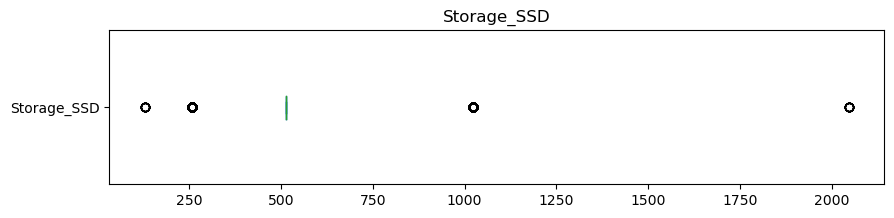

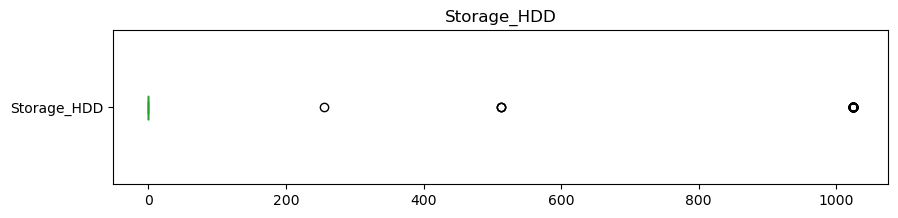

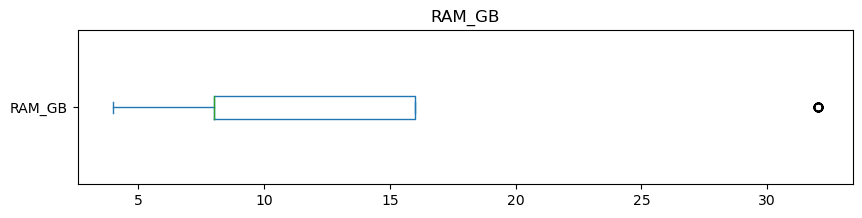

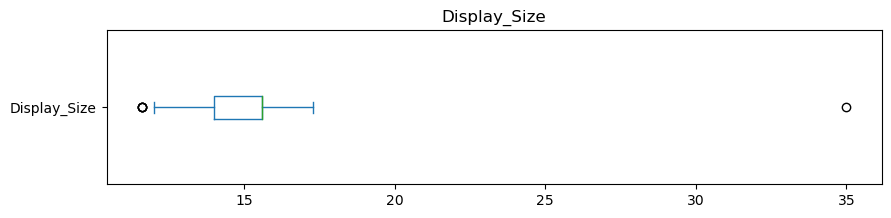

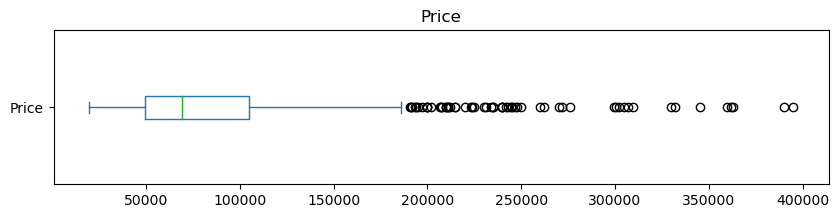

In [17]:
for feature in num_features:
    df[feature].plot(kind='box', vert=False,title=feature,figsize = (10, 2))
    plt.show()

In [18]:
#1 Year Onsite Warranty + 1 Year Premium Care + 1 Year Accidental Damage Protection

<AxesSubplot:xlabel='Price', ylabel='Count'>

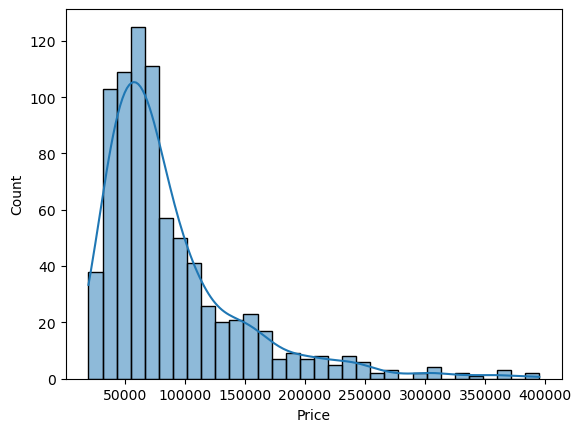

In [19]:
sns.histplot(df['Price'], kde=True)

In [20]:
df['Display_Size'].value_counts()

15.60    456
14.00    185
13.30     45
16.00     36
17.30     20
16.10     14
13.40     13
15.00      6
14.96      5
13.60      5
14.10      5
11.60      4
16.20      4
14.50      3
13.50      2
13.00      2
35.00      1
16.60      1
14.20      1
15.30      1
12.00      1
Name: Display_Size, dtype: int64

In [21]:
len(np.where(df['Display_Size']>=20)[0])

1

In [22]:
a = np.where(df['Display_Size']>=20)[0]
df.drop(labels=a, inplace=True)
df = df.reset_index(drop=True)
df.shape

(809, 13)

In [23]:
df1['Skew_2']=df.skew(axis = 0, skipna = True,numeric_only=True)
df1

,Skew_1,Skew_2
Storage_SSD,1.974246,1.972505
Storage_HDD,3.341363,3.338781
RAM_GB,1.523578,1.521798
Display_Size,5.366552,-0.600094
Price,2.022740,2.020803


In [24]:
1/0

ZeroDivisionError: division by zero

In [ ]:
df['Storage_HDD'].value_counts()

In [ ]:
df['Storage_SSD'].value_counts()

In [ ]:
b = np.where(df['Price']>=200000)[0]
len(b)

In [ ]:
#b = np.where(df['Price']>=200000)[0]
#len(b)
#df.drop(labels=b, inplace=True)
#df = df.reset_index(drop=True)
#df.shape

In [ ]:
#df1['Skew_3']=df.skew(axis = 0, skipna = True,numeric_only=True)
#df1

In [ ]:
#Creating function to subplot countplots
def count_subplot(dataframe, list_of_columns, list_of_titles,rot,y_tick,figw,figh):#, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Making sure you have enough rows
    fig, axes = plt.subplots(nrows=nrows, ncols=2,figsize=(figw, figh), sharex=True, sharey=True)
    ax = axes.flatten() 
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        
        ax[i].grid(False, axis='both')
        sns.countplot(x = dataframe[column], data = dataframe,ax=ax[i])
        ax[i].xticks(rotation = rot)
        ax[i].set(xlabel=None,ylabel=None)
        if y_tick==False:  ax[i].set_yticklabels(labels=[])
        ax[i].set_title(list_of_titles[i],fontweight="bold",size=16)
        for p in ax[i].patches:
            height = p.get_height() # get the height of each bar
            # adding text to each bar
            if ax[i].text!=0:
                ax[i].text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
                     y = height, # y-coordinate position of data label, padded 100 above bar
                     s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
                     ha = 'center', # sets horizontal alignment (ha) to center
                     size = 11,
                     fontweight="bold")
   

In [ ]:
#Creating function to subplot countplots
def count_subplot(dataframe, list_of_columns, list_of_titles,rot,y_tick,figw,figh):#, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Making sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(figw, figh)) # You'll want to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        
        ax[i].grid(False, axis='both')
        sns.countplot(x = dataframe[column], data = dataframe,ax=ax[i])
        ax[i].xticks(rotation = rot)
            #ax[i].set_xticklabels(labels=dataframe[column].value_counts().keys().to_list(), size=12,rotation=rot)
        ax[i].set(xlabel=None,ylabel=None)
        if y_tick==False:  ax[i].set_yticklabels(labels=[])
        ax[i].set_title(list_of_titles[i],fontweight="bold",size=16)
        for p in ax[i].patches:
            height = p.get_height() # get the height of each bar
            # adding text to each bar
            if ax[i].text!=0:
                ax[i].text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
                     y = height, # y-coordinate position of data label, padded 100 above bar
                     s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
                     ha = 'center', # sets horizontal alignment (ha) to center
                     size = 11,
                     fontweight="bold")

In [ ]:
df.columns

In [ ]:
#Creating lists for participation countplots function inputs
participation_columns = ['Brand','Processor_Brand','OS','Display_Type']#,'Office']#,'Storage_SSD','Storage_HDD','RAM_Type','RAM_GB']
participation_titles = ['Brand','Brand of Processor','Operating System','Type of Display']#,'Office']#,'SSD in GB','HDD in GB','Type of RAM','Size of RAM']

In [ ]:
#Plots countplots of Type, Inverter, Convertible, Condenser_Coil
count_subplot(df,participation_columns, participation_titles,90,False,15,20)#, participation_xlabels)

plt.tight_layout()

In [ ]:
df['RAM_Type'].value_counts()

In [ ]:
df['OS'].value_counts()

In [ ]:
df['Processor_Type'].value_counts()

In [ ]:
count_subplot(df,['Storage_SSD','Storage_HDD','RAM_GB','Display_Size'], 
              ['SSD in GB','HDD in GB','RAM size','Screen Size'],0,True,10,10)
plt.tight_layout()

In [ ]:
count_subplot(df,['Processor_Brand','Processor_Type'], ['Brand of Processor','Type of Processor'],90,True,20,10)
plt.tight_layout()

In [ ]:
for feature in num_features:
    df[feature].plot(kind='barh',title=feature,figsize = (10, 10))
    plt.show()

In [ ]:
 
for feature in ['Brand','Display_Size']:
    #df[feature].plot(kind='bar',title=feature,figsize = (10, 10))
    sns.countplot(y = df[feature], data = df) 
    plt.title(feature)
    #plt.ticks(y, labels=" ")
    #plt.labels(None)
    plt.figure(figsize=(15,5))
    #plt.set(xlabel=None,ylabel=None)
    #plt.xticks(labels = " ") 
    #plt.size(10, 5)
    plt.show()

In [ ]:
sns.countplot(y = df['Processor_Type'], data = df) 

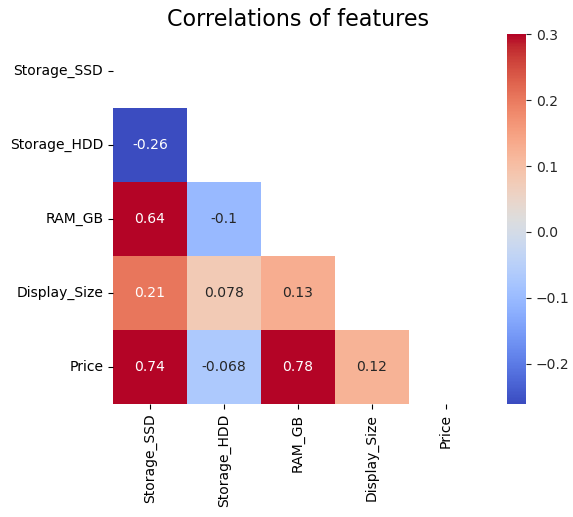

In [25]:
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
plt.title('Correlations of features', fontsize = 16)
with sns.axes_style("white"):
    sns.heatmap(df.corr(),mask=mask, vmax=.3, square=True, annot=True,cmap="coolwarm")

In [27]:
for i in cat_features:
    df[i]=df[i].str.strip()

In [28]:
df['Storage_HDD']=df['Storage_HDD'].astype('int')
df['Storage_SSD']=df['Storage_SSD'].astype('int')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            809 non-null    object 
 1   Processor_Brand  809 non-null    object 
 2   Processor_Type   809 non-null    object 
 3   Storage_SSD      809 non-null    int32  
 4   Storage_HDD      809 non-null    int32  
 5   RAM_GB           809 non-null    int64  
 6   RAM_Type         809 non-null    object 
 7   OS               809 non-null    object 
 8   Display_Size     809 non-null    float64
 9   Display_Type     809 non-null    object 
 10  Office           809 non-null    object 
 11  Warranty         809 non-null    object 
 12  Price            809 non-null    int64  
dtypes: float64(1), int32(2), int64(2), object(8)
memory usage: 76.0+ KB


In [31]:
df.to_csv('../data/transformed_data.csv',index=False)